In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import string

In [2]:
d={chr(i): i for i in range(255)} #char to ascii
c={i:chr(i)for i in range(255)} #ascii to char

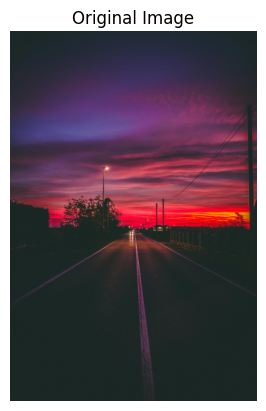

Image shape(Height,Width,Channels): (4965, 3310, 3)


In [4]:
#Load the image(change path to your image)
image_path=r"/content/pexels-enricoperini-705425.jpg"
x=cv2.imread(image_path)

#convert the rgb for matplotlib visualization
x_rgb=cv2.cvtColor(x,cv2.COLOR_BGR2RGB)

#show the original image
plt.imshow(x_rgb)
plt.title("Original Image")
plt.axis('off')
plt.show()

#display image shape
print("Image shape(Height,Width,Channels):",x.shape)

In [5]:
key="123"  #example key
text="secret" #message to hide

print("Key:",key)
print("Text:",text)

Key: 123
Text: secret


In [6]:
#show ascii value of text and key
text_ascii=[d[ch] for ch in text]
key_ascii=[d[ch] for ch in key]

print("Text_ascii:",text_ascii)
print("Key_ascii:",key_ascii)

Text_ascii: [115, 101, 99, 114, 101, 116]
Key_ascii: [49, 50, 51]


In [9]:
#make a copy of image to modify
x_enc=x.copy()

n,m,z=0,0,0
kl=0
l=len(text)

  # Encrypt and modify pixel values
for i in range(l):
    orig_val = x_enc[n, m, z]
    new_val = d[text[i]] ^ d[key[kl]]
    x_enc[n, m, z] = new_val
    print(f"Embedding '{text[i]}' (ASCII {d[text[i]]}) XOR '{key[kl]}' (ASCII {d[key[kl]]}) = {new_val} at pixel ({n}, {m}, {z}) [original={orig_val}]")

    n += 1
    m += 1
    z = (z + 1) % 3
    m = (m + 1) % 3
    kl = (kl + 1) % len(key)



Embedding 's' (ASCII 115) XOR '1' (ASCII 49) = 66 at pixel (0, 0, 0) [original=40]
Embedding 'e' (ASCII 101) XOR '2' (ASCII 50) = 87 at pixel (1, 2, 1) [original=40]
Embedding 'c' (ASCII 99) XOR '3' (ASCII 51) = 80 at pixel (2, 1, 2) [original=28]
Embedding 'r' (ASCII 114) XOR '1' (ASCII 49) = 67 at pixel (3, 0, 0) [original=40]
Embedding 'e' (ASCII 101) XOR '2' (ASCII 50) = 87 at pixel (4, 2, 1) [original=40]
Embedding 't' (ASCII 116) XOR '3' (ASCII 51) = 71 at pixel (5, 1, 2) [original=28]


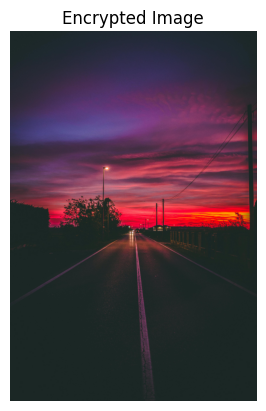

In [8]:
#save encrypted image
cv2.imwrite("/content/pexels-enricoperini-705425.jpg",x_enc)

#show encrypted image
plt.  imshow(cv2.cvtColor(x_enc,cv2.COLOR_BGR2RGB))
plt.title("Encrypted Image")
plt.axis('off')
plt.show()

In [14]:
n, m, z = 0, 0, 0
kl = 0
decrypt = ""

for i in range(l):
    val = x_enc[n, m, z]
    xor_val = val ^ d[key[kl]]

    # Decrypt and append
    orig_val = c.get(xor_val, '?')  # Use '?' if not found
    decrypt += orig_val

    print(f"Decrypting pixel ({n}, {m}, {z}): {val} XOR {d[key[kl]]} = {xor_val} -> '{orig_val}'")

    # Use same logic as encryption
    n += 1
    m += 1
    z = (z + 1) % 3
    m = (m + 1) % 3
    kl = (kl + 1) % len(key)

print("Decrypted Text:", decrypt)




Decrypting pixel (0, 0, 0): 66 XOR 49 = 115 -> 's'
Decrypting pixel (1, 2, 1): 87 XOR 50 = 101 -> 'e'
Decrypting pixel (2, 1, 2): 80 XOR 51 = 99 -> 'c'
Decrypting pixel (3, 0, 0): 67 XOR 49 = 114 -> 'r'
Decrypting pixel (4, 2, 1): 87 XOR 50 = 101 -> 'e'
Decrypting pixel (5, 1, 2): 71 XOR 51 = 116 -> 't'
Decrypted Text: secret
